<a href="https://colab.research.google.com/github/rajeevraizada/fMRI_tutorial_Jupyter_notebooks/blob/master/design_matrix_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tutorial on the basic structure of an fMRI design matrix, using Python.

Written by Rajeev Raizada: rajeev dot raizada at gmail dot com
 
This file follows up on two preceding ones:

A tutorial on convolving stimulus time-courses with the haemodynamic response function (HRF): [hrf_tutorial.ipynb](https://colab.research.google.com/drive/1-DDyBSCFUmzt3iFfQnD42y7xFTv5DPJB#sandboxMode=true)

The math of convolution: [math_of_convolution.ipynb](https://colab.research.google.com/drive/1rAQcdTGImpdXjeI46Usd6Y1-hKoeUvEB#sandboxMode=true)

I recommend taking a look at those two tutorials first, before going through this one.

None of these tutorials assume any prior knowledge of linear algebra.

This is a live Jupyter notebook, running on the Google Colab server (for free!). So, you can run the code, make changes to it, and see what happens. You need have a Google login (e.g. a Gmail account) in order to run the code on Google Colab. Before you run the code, Google will show a warning, telling you to check the code below, in order to make sure that it isn't trying to do anything malicious. Don't worry, it isn't! However, it's good practice to check, so please do take a look at the code below, before running it.

If you want to download the notebook, in order to run it on your own computer, then you can get it here: [design_matrix_tutorial.ipynb](http://www.bcs.rochester.edu/people/raizada/Python/design_matrix_tutorial.ipynb) 

#### Suggested exercise: change the code, re-run it, and see what happens

A good exercise is to change the onset times of the stimuli, and see what that does to the predicted voxel responses, the design matrix, and the estimates of the voxel sensitivities.

Note that this tutorial only shows the method where the design matrix assumes a specific shape to the HRF. It is also possible to estimate the HRF without making any assumptions about its shape. This is called using the Finite Impulse Response method, or FIR. This involves using a slightly more complicated design-matrix than the one we make below.

First, we import the Python modules that we need.

In [0]:
import numpy as np
from numpy.linalg import pinv  # We need the linalg part for "pinv", below
from matplotlib import pyplot as plt

# This next line just makes the fonts bigger. Their default size is too small
plt.rcParams.update({'font.size': 12})

First, let's make a pretend mini-hrf, just to show examples.
This is similar in shape to the HRFs that we looked at in
the program hrf_tutorial.m, but it doesn't have as many time-points.
 
One reason to use a shortened HRF like this is just to save typing! But in fact, this is approximately what a real HRF would look like if you only measured from it once every four seconds.
 
In fMRI, the time it takes to make a whole-brain measurement is called the TR (Time for Repetition, although people say "Repetition Time"). 

So, this HRF is similar to what we'd measure if our scanner had a TR of 4 seconds. These days, fast scanners can usually manage to get a whole-brain full of data in only 2s.


In [0]:
hrf_small = np.array([0,  4,  2,  -1,  0 ])

Let's plot it

In [0]:
time_vec = range(0,5)

Plot HRF against a time-vector [0,1,2,3,4]

'o-' means "use a line with circles on it"

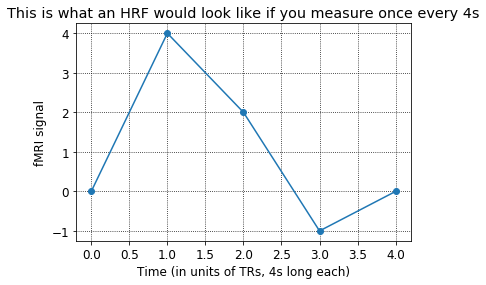

In [0]:
plt.plot(time_vec,hrf_small,'o-')  
                            
plt.xlabel('Time (in units of TRs, 4s long each)')
plt.ylabel('fMRI signal')
plt.title('This is what an HRF would look like if you measure once every 4s') 
plt.grid(color='k',linestyle=':')     # Overlay a dotted-line grid on top of the plot

Just as we did in hrf_tutorial.m, now we're going to make
a time-series of 1's and 0's representing the times when stimuli
are shown. These time-series will be convolved with the HRF,
in order to see what kinds of fMRI signals would be evoked in voxels that respond to the stimuli. These predicted responses will form the columns of our design matrix, as is shown in more detail below.

Just for purposes of illustration, we're going to imagine that
one of our stimuli is flashing up a word on the screen, and that
the other is flashing up a picture of an object.

These stimulus onsets will probably produce more complex patterns
of neural firing than the sudden flash of light that we talked about in HST_hrf_tutorial.m, but we're going to ignore that complication for now. We'll simply suppose that each stimulus instantly kicks off its own standard-shaped HRF.

This is what's typically done in event-related fMRI, and it turns
out that it usually works pretty well.

Now suppose we present a word at time t=2

In [0]:
word_stim_time_series = np.array([0, 1, 0, 0, 0, 0])
stim_time_series_vec  = np.array([0, 1, 2, 3, 4, 5])

And let's present a picture of an object at time t=4

In [0]:
object_stim_time_series = np.array([0, 0, 0, 1, 0, 0])

Let's convolve these with our mini-HRF to see what kind of fMRI signals they would evoke in voxels which respond to words or pictures.

In [0]:
predicted_signal_that_word_would_evoke = np.convolve(word_stim_time_series,hrf_small)
# Let's print the name of the vector, and what it looks like, with a line break
# in between so that it looks nice
print('predicted_signal_that_word_would_evoke','\n',predicted_signal_that_word_would_evoke)

predicted_signal_that_object_would_evoke = np.convolve(object_stim_time_series,hrf_small)
print('predicted_signal_that_object_would_evoke','\n',predicted_signal_that_object_would_evoke)


predicted_signal_that_word_would_evoke 
 [ 0  0  4  2 -1  0  0  0  0  0]
predicted_signal_that_object_would_evoke 
 [ 0  0  0  0  4  2 -1  0  0  0]


Let's plot all this. We'll use subplots to make the plots line up prettily.

In the subplot command below, the first number is how many rows of subplots we have: 3
                
The second number is how many columns: 1

The third number is which subplot to draw in: the first one. 
                
So, we end up with three plots stacked on top of each other, and we draw in the first one (which is the uppermost subplot)

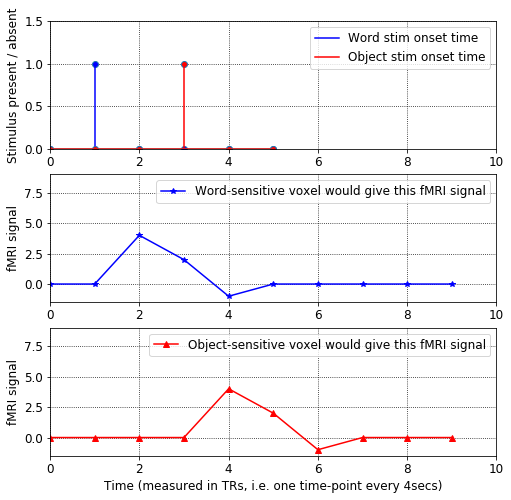

In [0]:
# We need a time-series vector to use as our x-coords in plot
vec_length = predicted_signal_that_object_would_evoke.shape[0]
time_series_vec = range(0,vec_length)

plt.figure(figsize=(8, 8))   # This makes the figure bigger: 8x8
plt.subplot(3,1,1)  
        
word_blob, word_stem, word_base = plt.stem(stim_time_series_vec,word_stim_time_series)
plt.setp(word_blob, 'markerfacecolor', 'b')
plt.setp(word_stem, 'color', 'b')  # Stem makes a nice looking plot with lines and circles

object_blob, object_stem, object_base = plt.stem(stim_time_series_vec,object_stim_time_series)
plt.setp(object_blob, 'markerfacecolor', 'r')
plt.setp(object_stem, 'color', 'r')

plt.grid(color='k',linestyle=':') 

plt.plot([0,0],[0,0],'b',label='Word stim onset time')
plt.plot([0,0],[0,0],'r',label='Object stim onset time')
plt.axis([0, 10, 0, 1.5]) # This just sets the display graph axis size
                          # The first two numbers are the x-axis range: 0 10
                          # The last two numbers are the y-axis range: 0 to 1.5

plt.legend()             
plt.ylabel('Stimulus present / absent')

plt.subplot(3,1,2)
plt.plot(predicted_signal_that_word_would_evoke,'b*-',\
         label='Word-sensitive voxel would give this fMRI signal')  
                                    
plt.grid(color='k',linestyle=':')
plt.legend()
plt.axis([0, 10, -1.5, 9])
plt.ylabel('fMRI signal')

plt.subplot(3,1,3)
plt.plot(time_series_vec,predicted_signal_that_object_would_evoke,'r^-',\
         label='Object-sensitive voxel would give this fMRI signal') 
                                  
plt.legend()
plt.axis([0, 10, -1.5, 9])
plt.xlabel('Time (measured in TRs, i.e. one time-point every 4secs)')
plt.ylabel('fMRI signal')
plt.grid(color='k',linestyle=':')

## What the design matrix has in it

Here's the key part. The design matrix is built up out of these predicted responses.

Each column of the design matrix is the predicted fMRI signal that a voxel would give, if it were perfectly and exclusively sensitive to a particular stimulus-condition.

In our case, the first column of the design matrix
would be the vector "predicted_signal_that_word_would_evoke"
that we made just above, and the second column would be the vector "predicted_signal_that_object_would_evoke"

So, the most important part of the design matrix 
is simply these two vectors side-by-side.

A real design matrix would have some other columns in it too, which have other types of predicted fMRI signals in them, e.g. what the signal would look like if the scanner's output were slowly drifting in time.

But those other columns don't deal with the signal that the stimuli would be predicted to evoke in the brain, and so we can ignore them for now.

It's the **columns** of the design matrix that get built up out of these predicted responses to the different stimulus types, but the actual vectors that we made above are row vectors, i.e. just a bunch of numbers in a row.

So, to match the format of the design matrix, we need to turn these into column vectors, by transposing them (i.e. flipping them).

We do this by putting reshape(-1,1) at the end of the vector. This (-1,1) is a bit confusing, to me at least. The -1 part means "this can take any value".
So, (-1,1) means "reshape to any number of rows, and one column". In other words, reshape into a column vector.

In [0]:
predicted_word_response_column_vec = predicted_signal_that_word_would_evoke.reshape(-1,1)
print('predicted_word_response_column_vec','\n',predicted_word_response_column_vec)

print('\n')  # Just print an empty line, to make the text output spacing look nice

predicted_object_response_column_vec = predicted_signal_that_object_would_evoke.reshape(-1,1)
print('predicted_object_response_column_vec','\n',predicted_object_response_column_vec)

predicted_word_response_column_vec 
 [[ 0]
 [ 0]
 [ 4]
 [ 2]
 [-1]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]]


predicted_object_response_column_vec 
 [[ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 4]
 [ 2]
 [-1]
 [ 0]
 [ 0]
 [ 0]]


Now we can join these two column vectors together 
to make the design matrix. We simply put the two columns side-by-side.

In Python, you make new matrices and vectors by 
using the commands hstack and vstack. Note that to join them together in this way, they must be the same length as each other.

In [0]:
design_matrix = np.hstack([ predicted_word_response_column_vec, predicted_object_response_column_vec ])

print('design_matrix','\n',design_matrix)

design_matrix 
 [[ 0  0]
 [ 0  0]
 [ 4  0]
 [ 2  0]
 [-1  4]
 [ 0  2]
 [ 0 -1]
 [ 0  0]
 [ 0  0]
 [ 0  0]]


## Translation guide

In equations, the design matrix is almost always called X

Note that this is a capital "X". 

In [0]:
X = design_matrix

print('X','\n',X)

X 
 [[ 0  0]
 [ 0  0]
 [ 4  0]
 [ 2  0]
 [-1  4]
 [ 0  2]
 [ 0 -1]
 [ 0  0]
 [ 0  0]
 [ 0  0]]


Capitals are typically used for matrices, and small-case is used for vectors. The only difference between a vector and a matrix is that
a vector is just a bunch of numbers in a row (a row-vector) or a bunch of numbers in a column (a column-vector), whereas a matrix is bunch of vectors stacked up next to each other to make a rectangular plt.grid, with rows **and** columns of numbers.

Now let's view a grayscale plot of the design matrix, in the way that an fMRI-analysis package, such as SPM, would show it.

To do this, we use the Python command "imshow".
This takes each number in the design matrix and represents it as a colour, with the colour depending on how big the number is. In this case, we'll be using a gray colour-scale, so low numbers
will be shown as darker grays, and high numbers are lighter grays.

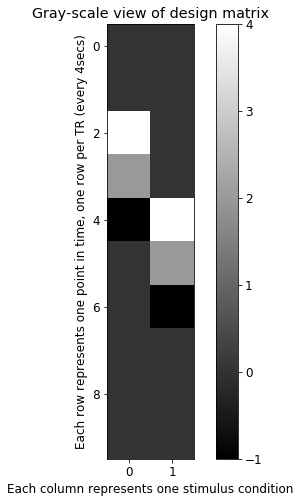

In [0]:
plt.figure(figsize=(8, 8))   # This makes the figure bigger: 8x8

plt.imshow(design_matrix, cmap='gray',interpolation='nearest')  
      
plt.title('Gray-scale view of design matrix')
plt.xlabel('Each column represents one stimulus condition')
plt.ylabel('Each row represents one point in time, one row per TR (every 4secs)')

plt.colorbar()  # Shows how the numbers lie on the colour scale
                # Note that the highest number in the design matrix,
                # which is 4, is shown as white, and the lowest, -1,
                # gets shown as black.

Now suppose we have a voxel which responds only to words, not to objects. We can calculate how it would be predicted to respond to our word+object display as follows:

Predicted response from word-sensitive voxel = 
1 * Response which word-presentation would evoke 
+ 0 * Response which object-presentation would evoke 

Note that this is how the voxel would be predicted to respond if there were no noise whatsoever in the system. Clearly a real fMRI signal would never be this clean.

Now, let's make a "sensitivity vector" for this voxel, in which each entry will say how sensitive that voxel is to the corresponding stimulus condition.

This voxel is sensitive to words, which are our **first** stimulus-type. And we made the predicted word response into the first column of 
the design matrix. So, the sensitivity of this voxel to words will be the first element
in the sensitivity-vector.

Similarly, the sensitivity of this voxel to the second stimulus-type, which are objects, will be the second element in the sensitivity vector.

So, the sensitivity vector for a voxel with 
sensitivity = 1   to the first stimulus-type, which are words and  sensitivity = 0   to the second stimulus-type, which are objects will be [  1,  0  ]

I know this seems trivial !!
Things will get more interesting in a minute...

In [0]:
sensitivity_vec = np.array([ 1, 0]).reshape(-1,1)
print('sensitivity_vec','\n',sensitivity_vec)

sensitivity_vec 
 [[1]
 [0]]


Translation guide:

In equations, the numbers in the sensitivity-vector are typically called "beta-values", or sometimes "beta-coefficients" or "beta-weights".
The columns of the design matrix are called "regressors" and the value that is assigned to each regressor is the beta-value.

Note that in the example above, we are pretending that we already **know** how sensitive our voxel is to the various stimuli, but in the real world
we don't know this. We're trying to figure out what stimuli our voxel is sensitive to, using the fMRI data that we collect in the scanner.
This will be described more below.

In math-speak, that means that we are trying to **estimate** the betas. When people want to distinguish between the true beta-value
(which we don't know) and the estimated beta-value that we figure out from our data, then they call the true one beta and  the estimated one "beta hat" (beta with a circumflex sign on top of it:  ^ )

( End of that part of the translation guide, back to the main theme... )

So, we can now express our predicted voxel response in termsof entries in the sensitivity vector multiplied by columns in the design matrix:

Predicted response from word-sensitive voxel = \
1 * Response which word-presentation would evoke + \
0 * Response which object-presentation would evoke 

And because of the way we made our sensitivity vector and design matrix, this can be re-written as:

Predicted response from word-sensitive voxel = \
(First element in sensitivity vector) * (First column in design matrix) + \
(Second element in sensitivity vector) * (Second column in design matrix)

Here's an important bit:
The process above, of going through the elements in a vector, multiplying each element by the corresponding column in a matrix, and then adding up the results of the multiplication, is precisely what matrix multiplication does.

In order to matrix-multiply our design matrix by our sensitivity-vector, we just use the NumPy command for matrix-multiplying arrays, which is np.dot()

NumPy also can represent data as actual matrices, rather than arrays, and matrices get matrix-multiplied differently. But it turns out that using arrays is usually more convenient.
See the section "'array' or 'matrix'? Which should I use?", at https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html

In [0]:
predicted_word_selective_voxel_response = np.dot(design_matrix,sensitivity_vec)
print('predicted_word_selective_voxel_response','\n',predicted_word_selective_voxel_response)

predicted_word_selective_voxel_response 
 [[ 0]
 [ 0]
 [ 4]
 [ 2]
 [-1]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]]


When we multiply the design matrix by the sensitivity vector, we make the i-th row of the result by taking the i-th row of the matrix, rotating it 90 degrees, multiplying it element-by-element with the sensitivity vector, and then adding that all up.

Since the sensitivity vector is in this case [ 1, 0 ], multiplying each matrix row by it element-by-element means that we end up getting \
1* the first element in each row, and \
0* the second element in each row.

So, by the time we have gone through all the rows, we have \
1* the first column of the design matrix, plus \
0* the second column,
which is what we wanted.

Let's plot all this:

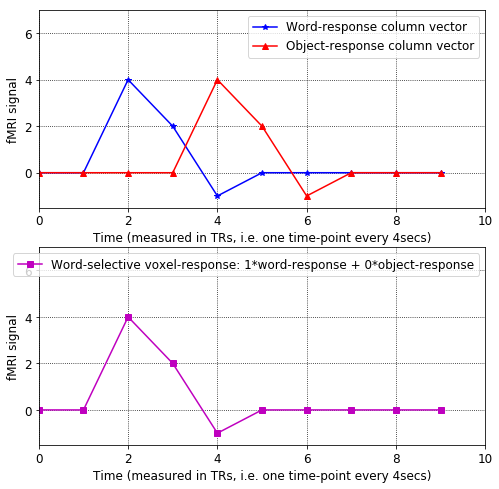

In [0]:
plt.figure(figsize=(8, 8))   # This makes the figure bigger: 8x8

plt.subplot(2,1,1)
plt.plot(predicted_word_response_column_vec,'b*-',label='Word-response column vector') 
plt.plot(predicted_object_response_column_vec,'r^-',label='Object-response column vector')
plt.grid(color='k',linestyle=':') # Add a dotted grid. 'k' means colour black
plt.legend()
plt.axis([0, 10, -1.5, 7])
plt.xlabel('Time (measured in TRs, i.e. one time-point every 4secs)')
plt.ylabel('fMRI signal')

plt.subplot(2,1,2)
plt.plot(predicted_word_selective_voxel_response,'ms-', \
         label='Word-selective voxel-response: 1*word-response + 0*object-response')
plt.legend() 
plt.axis([0, 10, -1.5, 7]) 
plt.xlabel('Time (measured in TRs, i.e. one time-point every 4secs)') 
plt.ylabel('fMRI signal')
plt.grid(color='k',linestyle=':')

Now let's try a voxel which responds equally to both words and objects
So, it's sensitivity vector will be [ 1, 1 ]

This means that its response will be: \
1* the first column of the design matrix, plus \
1* the second column

i.e. \
1* the response which the word stimulus evokes + \
1* the response which the object stimulus evokes

In [0]:
sensitivity_vec = np.array([ 1, 1 ]).reshape(-1,1)
print('sensitivity_vec','\n',sensitivity_vec)

print('\n')
predicted_unselective_voxel_response = np.dot(design_matrix,sensitivity_vec)
print('predicted_unselective_voxel_response','\n',predicted_unselective_voxel_response)


sensitivity_vec 
 [[1]
 [1]]


predicted_unselective_voxel_response 
 [[ 0]
 [ 0]
 [ 4]
 [ 2]
 [ 3]
 [ 2]
 [-1]
 [ 0]
 [ 0]
 [ 0]]


Let's plot all this:

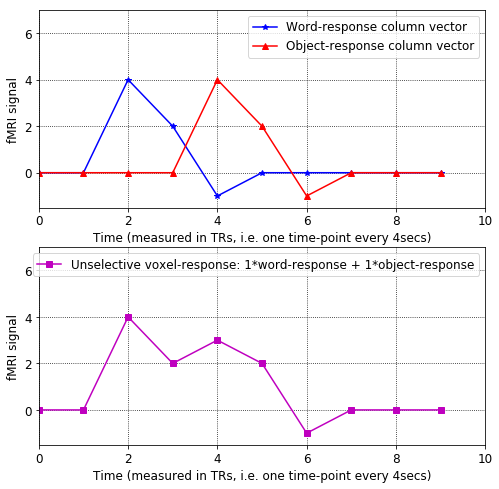

In [0]:
plt.figure(figsize=(8, 8))   # This makes the figure bigger: 8x8

plt.subplot(2,1,1)
plt.plot(predicted_word_response_column_vec,'b*-',label='Word-response column vector') 
plt.plot(predicted_object_response_column_vec,'r^-',label='Object-response column vector')
plt.grid(color='k',linestyle=':')
plt.legend()
plt.axis([0, 10, -1.5, 7])
plt.xlabel('Time (measured in TRs, i.e. one time-point every 4secs)')
plt.ylabel('fMRI signal')

plt.subplot(2,1,2)
plt.plot(predicted_unselective_voxel_response,'ms-', \
         label='Unselective voxel-response: 1*word-response + 1*object-response')
plt.legend() 
plt.axis([0, 10, -1.5, 7]) 
plt.xlabel('Time (measured in TRs, i.e. one time-point every 4secs)') 
plt.ylabel('fMRI signal')
plt.grid(color='k',linestyle=':')

Ok, I hope this isn't overkill: let's try a voxel which gives a normal response to words, but which gives a response to objects which is **twice** as strong. So, its sensitivity vector will be [ 1, 2 ].

This means that its response will be: \
1* the first column of the design matrix, plus \
2* the second column

i.e. \
1* the response which the word stimulus evokes + \
2* the response which the object stimulus evokes

In [0]:
sensitivity_vec = np.array([ 1, 2 ]).reshape(-1,1)
print('sensitivity_vec','\n',sensitivity_vec)

print('\n')
predicted_object_preferring_voxel_response = np.dot(design_matrix,sensitivity_vec)
print('predicted_object_preferring_voxel_response','\n',predicted_object_preferring_voxel_response)

sensitivity_vec 
 [[1]
 [2]]


predicted_object_preferring_voxel_response 
 [[ 0]
 [ 0]
 [ 4]
 [ 2]
 [ 7]
 [ 4]
 [-2]
 [ 0]
 [ 0]
 [ 0]]


Let's plot all this:

Text(0, 0.5, 'fMRI signal')

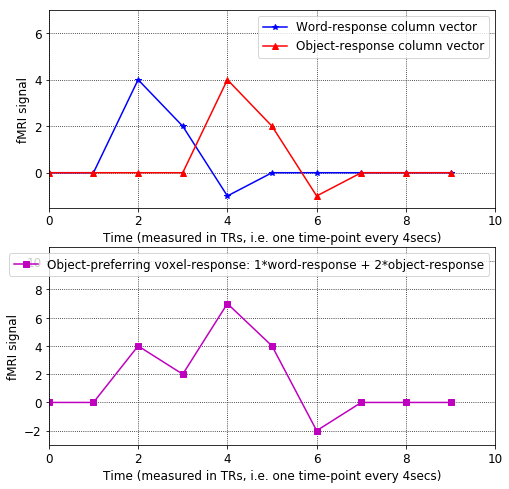

In [0]:
plt.figure(figsize=(8, 8))   # This makes the figure bigger: 8x8

plt.subplot(2,1,1)
plt.plot(predicted_word_response_column_vec,'b*-',label='Word-response column vector') 
plt.plot(predicted_object_response_column_vec,'r^-',label='Object-response column vector')
plt.grid(color='k',linestyle=':')
plt.legend()
plt.axis([0, 10, -1.5, 7])
plt.xlabel('Time (measured in TRs, i.e. one time-point every 4secs)')
plt.ylabel('fMRI signal')

plt.subplot(2,1,2)
plt.plot(predicted_object_preferring_voxel_response,'ms-', \
         label='Object-preferring voxel-response: 1*word-response + 2*object-response')
plt.grid(color='k',linestyle=':')
plt.legend() 
plt.axis([0, 10, -3, 11]) 
plt.xlabel('Time (measured in TRs, i.e. one time-point every 4secs)') 
plt.ylabel('fMRI signal')

So, to recap:

Voxel response = Design matrix * sensitivity vector

Each column of the design matrix is the response to a particular stimulus. Each row of it is a moment in time, with one row per MRI image-acquisition. So, reading down a column (through the rows), gives the response through
time to a particular stimulus.

Each element in the sensitivity vector is a measure of how much that voxel responds to the stimulus in the corresponding column of the design matrix.

When we multiply the design matrix by the sensitivity vector, this produces a 
result which takes each column, which is the responses that each stimulus-type would evoke, then multiplies that column by how sensitive that voxel is to that particular stimulus, and then adds together the results of all those multiplications.

But so far we've only been talking about an imaginary situation in which we already **know** which stimuli our voxel is sensitive to, and we use that knowledge to calculate how the voxel ought to respond. That's why we have been talking about **predicted** voxel responses so far.

## Here's the key bit: 

In fMRI, we have exactly the reverse situation:
we **measure** how the voxels respond, and we want to figure out which stimuli they must therefore have been sensitive to.

i.e. \
Voxel response = Design matrix * sensitivity vector 

* Voxel response: We measure this with the scanner

* Design matrix: We build this from the stimulus onset times convolved with the HRF

* Sensitivity vector: We want to find this out

So, we measure a voxel's response, and we know that it should be equal to (Design matrix * sensitivity vector).

It won't be exactly equal to that, because the signal is noisy. We'll ignore the noise for now, but we'll come back to it soon below.

What we need to do is to unpack the result of this multiplication, so that we can take (Design matrix * sensitivity vector) and pull out the part that we don't already know and that we want,
namely the sensitivity vector.

To do that, we need the concept of a **matrix inverse**.

If multiplying by a matrix, M, does one thing,
then multiplying by its inverse, inv(M), does the opposite.

From above, we can measure the value of (Design matrix * sensitivity vector), because its value is the voxel response). What we need to find out
is just the sensitivity vector on its own.

So, we can achieve this by multiplying by the inverse of the design matrix

inv(design matrix) * design matrix * sensitivity vector = sensitivity vector

But since \
design matrix * sensitivity vector = voxel response,

the above is the same as: \
inv(design matrix) * voxel response

Given that we **know** the design matrix (we built it), we just need to calculate its inverse, multiply it by the voxel response, and then we will get that voxel's sensitivity vector.

sensitivity vector = inv(design matrix) * voxel response

And since the voxel's sensitivity vector is just a list of the responses which it gives to each of the stimuli which we presented, it therefore tells us which stimuli make that voxel light up.

And that is what we wanted to find out!

This is pretty much what any fMRI-analysis package does, although they often organise the results a bit differently. The "sensitivity vector" above is a list of numbers for a single voxel: each number describes how closely the BOLD signal time-course from that voxel matches to the corresponding column of the design matrix.

In an fMRI-analysis package, instead of getting a separate "sensitivity vector" for each voxel, you may instead get a "sensitivity image" for each design matrix column, where each image is a brain-full of sensitivity values. Since these sensitivity values are called "betas", the brains-full of beta-values are called "beta-images".

The value in a given voxel is the measure of how closely that voxel's BOLD time-course matches to the corresponding column of the design matrix.
In SPM, for example, beta_001.nii is a brain-full of numbers saying how sensitive each voxel is to the 1st column in the design matrix. So, the beta-images are made up of the same numbers as we are calculating here for the "sensitivity vector", it's just that they're grouped into brain-sized images, rather than given one voxel at a time.

Now, it turns out that what I just told you about inverses isn't really true. We don't multiply by the inverse of the design matrix. We multiply by something that is basically the same, only slightly more complicated, called the "pseudo-inverse". In Python, the pseudo-inverse of X is written pinv(X). We imported this function from numpy.linalg, using the command `from numpy.linalg import pinv` at the very top of this script, above.

If you really want to know what a pinv is made out of: pinv(X) = inv(X'X)X'

For our purposes, the difference between a matrix inverse and a pseudo-inverse isn't really important. The key point is to see that trying to figure out a voxel's sensitivity vector is the problem of trying to work out which vector would have to be multiplied by the design matrix, in order to give the voxel response vector
which we measured with the scanner. 

So, the equation for figuring out a voxel's sensitivity is:

Voxel response = Design matrix * sensitivity vector

which means that we can calculate the sensitivity vector like this:

Sensitivity vector = pinv(design matrix) * voxel response

We mentioned above that there's noise in the signal. It turns out that with the noise included, the equation is:

Voxel response = Design matrix * sensitivity vector  +  noise

... where noise means 
"anything in the measured signal that our design matrix can't explain".

This is a problem, because with the noise, it's no longer true that the measured voxel response is exactly equal to the design matrix multiplied by the sensitivity vector.

Luckily, it turns out that this doesn't stop us from being able to **estimate** a sensitivity vector, even though the noise prevents us
from being able to calculate exactly what the voxel's sensitivities are.

It turns out that we can still use the pseudo-inverse of the design matrix, and that this gives us the best estimate of the sensitivity vector that we could get, despite the noise.

So, although the noise prevents us from calculating the "true" sensitivity vector, it doesn't stop us from getting a good estimate:

estimated sensitivity vector  =  pinv(design matrix) * voxel response

## Translation guide:
The fMRI signal that we measure from the scanner, which we call "voxel response" or "measured_voxel_data" here, is usually called "y" in equations.

As before, the design matrix is called X, and the 
voxel sensitivities are called beta-values.
To show that a beta-value is estimated, rather than being the real but unknown sensitivity of the voxel, a hat sign gets put on it: beta-hat

So, instead of the equation that we write below:
estimated_voxel_sensitivity = pinv(design_matrix) * measured_voxel_data

... you'll see an equation that looks like this:

 beta = inv(X'X)X' * y

or, with the hat-sign to show that beta is just an estimate:

beta_hat = inv(X'X)X' * y


Ok, let's try that with an example.

Suppose we measure this data:

In [0]:
measured_voxel_data = np.array([ 1, -1, 12, 8, -1, 5, -3, 1, -2, -1 ]).reshape(-1,1)

print('measured_voxel_data','\n',measured_voxel_data)

measured_voxel_data 
 [[ 1]
 [-1]
 [12]
 [ 8]
 [-1]
 [ 5]
 [-3]
 [ 1]
 [-2]
 [-1]]


This is is what often gets called "y".
This measured signal is probably some kind of mixture of a response to the word stimulus and a response to the object stimulus, with random noise thrown on top.

Let's plot it:



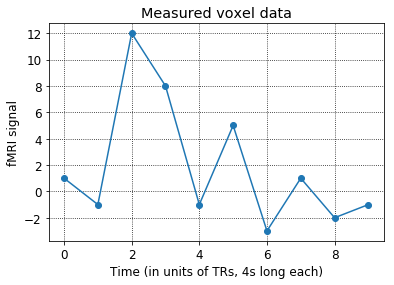

In [0]:
plt.plot(measured_voxel_data,'o-')     
                  
plt.xlabel('Time (in units of TRs, 4s long each)')
plt.ylabel('fMRI signal')
plt.title('Measured voxel data')
plt.grid(color='k',linestyle=':')

What is the estimated sensitivity vector of this voxel ?

Well, we make the pseudo-inverse of the design matrix, and matrix-multiply it by the vector of measured voxel data. The easiest way to write "matrix multiply" in Python is using the '@' symbol. 

This estimated_voxel_sensitivity is what gets called beta-hat in the math.

In [0]:
estimated_voxel_sensitivity = pinv(design_matrix) @ measured_voxel_data

print('estimated_voxel_sensitivity','\n',estimated_voxel_sensitivity)

estimated_voxel_sensitivity 
 [[3.29647059]
 [1.05647059]]


So, the estimate is that this voxel is around 3 times more sensitive to words than it is to objects.

Now, let's make a plot of what the predicted response would be of a voxel that has a sensitivity matrix which is **exactly** our estimate, and compare it to the voxel response which we measured. They won't be exactly the same, because of the noise in the signal.

In [0]:
predicted_voxel_output = design_matrix @ estimated_voxel_sensitivity

This predicted overall voxel output is just the
predicted response to the word, plus the predicted response to the object.
As we saw in hrf_tutorial.m, the idea that we can calculate the overall response simply by adding up these two separate responses is what it
means to say that we are assuming that the system is LINEAR.

If we want to look at the predicted responses to the separate stimulus types, we can calculate them by separately multiplying the corresponding column of the design matrix by the corresponding element of the estimated sensitivity vector.

In [0]:
predicted_response_to_word = predicted_word_response_column_vec * \
                             estimated_voxel_sensitivity[0]

predicted_response_to_object = predicted_object_response_column_vec * \
                               estimated_voxel_sensitivity[1]

Let's plot all this:

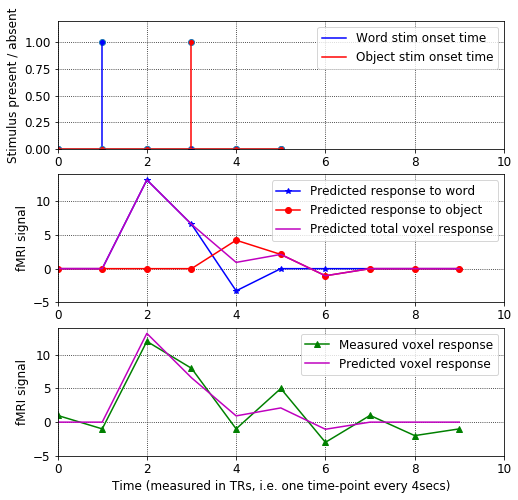

In [0]:
plt.figure(figsize=(8, 8))   # This makes the figure bigger: 8x8

plt.subplot(3,1,1) # This is just to make the plots line up prettily
      
word_blob, word_stem, word_base = plt.stem(stim_time_series_vec,word_stim_time_series)

plt.setp(word_blob, 'markerfacecolor', 'b')
plt.setp(word_stem, 'color', 'b')

object_blob, object_stem, object_base = plt.stem(stim_time_series_vec,object_stim_time_series)
plt.setp(object_blob, 'markerfacecolor', 'r')
plt.setp(object_stem, 'color', 'r')

plt.grid(color='k',linestyle=':')
# Plot dummy lines to give the right colours to the legend
plt.plot([0,0],[0,0],'b',label='Word stim onset time')
plt.plot([0,0],[0,0],'r',label='Object stim onset time')
plt.legend()
plt.axis([0, 10, 0, 1.2]) # This just sets the display graph axis size
plt.ylabel('Stimulus present / absent')

plt.subplot(3,1,2)
plt.plot(predicted_response_to_word,'b*-',label='Predicted response to word')
plt.plot(predicted_response_to_object,'ro-',label='Predicted response to object')
plt.plot(predicted_voxel_output,'m-',label='Predicted total voxel response')
                ### Note that the predicted_voxel_output is simply the sum of
                ### predicted_response_to_word and predicted_response_to_object
plt.grid(color='k',linestyle=':')
plt.legend()
plt.axis([0, 10, -5, 14])
plt.ylabel('fMRI signal')

plt.subplot(3,1,3)
plt.plot(measured_voxel_data,'g^-',label='Measured voxel response')
plt.plot(predicted_voxel_output,'m-',label='Predicted voxel response')
plt.legend()
plt.axis([0, 10, -5, 14])
plt.xlabel('Time (measured in TRs, i.e. one time-point every 4secs)')
plt.ylabel('fMRI signal')
plt.grid(color='k',linestyle=':')


From Fig.8, we can see that the voxel-sensitivities that we estimated give a predicted overall voxel response which matches reasonably
closely to the actual measured voxel data.

But the match isn't perfect. That's because the MRI signal has noise in it. By "noise", we basically mean, "any changes in the MRI signal that our design matrix can't explain".

All that our design matrix talks about is the predicted response to the word stimulus and the predicted response to the object stimulus.
These predicted responses are made from HRFs, and so they change on a slow, HRF kind of time-scale, i.e. over several seconds.

So, if there are either much more rapid changes in the fMRI signal, or much slower changes, then the design matrix won't be able to account for them.

In a real design matrix, there would be extra columns that would try to account for any slower changes that there might be, e.g. slow drifts in the signal that the scanner is giving out.

Sometimes it's also possible to explain away very rapid changes. For example, if we put columns in the design matrix that describe how much the subject's head moved, then it might turn out 
that some of the rapid MRI signal changes correlate closely with the amount of head-movement. This is what people are referring to 
when they talk about "putting in motion as a regressor".

But there's always some noise that we simply can't get rid of. If there's not much left-over noise, then we can be fairly confident that the voxel-sensitivity vector that we calculated above
is a good estimate. And if there's a lot of left over noise, then we probably won't be very confident.

That's the basis of the statistical tests that
any fMRI-analysis package starts to apply after it has used the design matrix to estimate how sensitive each voxel is to the various stimulus-types that we presented.

However, those statistical tests are a topic for a different talk.

For more detailed coverage of these and related topics, I recommend these very good tutorials by Matthew Brett, which also have accompanying Python code:
http://matthew-brett.github.io/teaching/
